# Earthquake Deformation and Locating

**This assignment has two main parts:**

1) Revisit the global earthquake catalog, make a map that shows magnitude and make interpretations about where the largest earthquakes happen. [10 points]

2) Plot the seismograph associated with a 2020 earthhquake and make interpretations related to seismic wave travel time. [15 points]

**To do these things, you will need to be using the python libraries we have used thus far:**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

## The global earthquake catalog
Revisit the global earthquake catalog from the in-class notebook with large earthquakes from the past decade. Please use Sept. 15, 2010-Sept. 15, 2020 (Or the autograding feature will fail your question 2 answer). Start by importing the data. Please, name your dataframe `EQ_data` we as did in-class.

In [2]:
start_day = '2010-09-15'
end_day = '2020-09-15'
standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'

query_url = standard_url + '&starttime=' + start_day + '&endtime=' + end_day + '&minmagnitude=5.0'
EQ_data = pd.read_csv(query_url)
EQ_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2011-03-11T05:46:24.120Z,38.2970,142.3730,29.00,9.1,mww,541.0,9.5,NaN,1.16,...,2021-02-16T15:22:39.454Z,"2011 Great Tohoku Earthquake, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,official
1,2012-04-11T08:38:36.720Z,2.3270,93.0630,20.00,8.6,mw,499.0,16.6,NaN,1.33,...,2021-02-18T19:35:11.150Z,off the west coast of northern Sumatra,earthquake,NaN,NaN,NaN,NaN,reviewed,us,official
2,2015-09-16T22:54:32.860Z,-31.5729,-71.6744,22.44,8.3,mww,NaN,19.0,0.684,1.02,...,2021-08-01T21:19:38.437Z,"48 km W of Illapel, Chile",earthquake,4.7,3.2,NaN,NaN,reviewed,us,us
3,2013-05-24T05:44:48.980Z,54.8920,153.2210,598.10,8.3,mww,385.0,10.0,NaN,1.02,...,2020-07-10T18:06:54.696Z,Sea of Okhotsk,earthquake,NaN,4.1,NaN,NaN,reviewed,us,us
4,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2020-07-10T15:52:13.262Z,"267 km E of Levuka, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us


### Make a map of these earthquake locations

Make a map where you plot these earthquake locations. In addition to plotting the earthquake locations, we can plot the location of plate boundaries. I took the plate boundaries provided by the US Geological Survey (USGS) and split them by their categorization into trenches (subduction zones), ridges (spreading centers) and transform (strike-slip boundaries like the San Andreas fault).

The code below makes a map where these different plate boundaries are represented by different color lines.

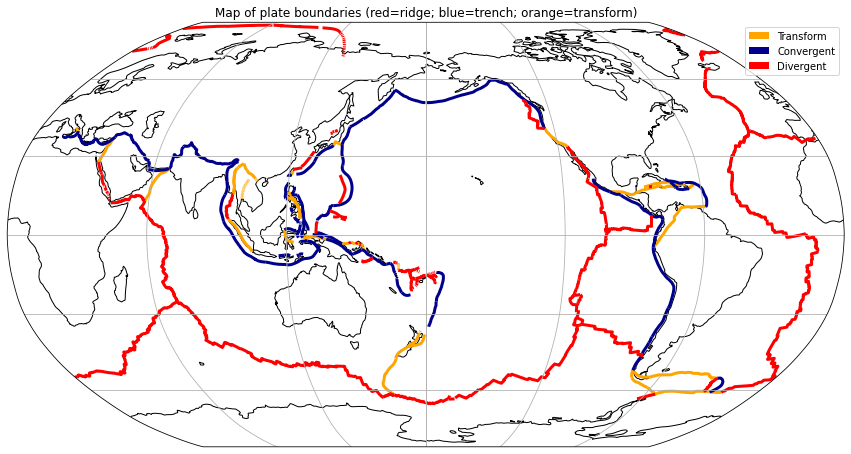

In [3]:
plt.figure(1,(15,15)) # make a big figure 

ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

data = Reader('./data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('./data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('./data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

plt.title('Map of plate boundaries (red=ridge; blue=trench; orange=transform)')
# make patches to add to a legend
trans = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
con = mpatches.Rectangle((0, 0), 1, 1, facecolor="darkblue")
div = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
labels = ['Transform','Convergent','Divergent']
plt.legend([trans, con, div], labels)

plt.show()

**Make a map where these plate boundaries are shown and the recent earthquake locations are also plotted.**

**Make a map that categorizes earthquakes by magnitude.** 

Here is my suggestion for how this could be done:
- Filter the global earthquake catalog dataframe to make a new dataframe that only has large earthquakes (magnitude 5 or greater), another that only has the larger earthquakes (magnitude 6 or greater) and another that only has the largest earthquakes (magnitude 7 or greater) and make a map where they are plotted along with all the other earthquakes, but in a separate colors/sizes. A dataframe can be filtered using syntax like this where `dataframe` is the name of the dataframe that has your data and `dataframe_new` being whatever name you want to assign to your new dataframe: 

`dataframe_new = dataframe[dataframe['column_a'] > 5]` e.g. `earthquakes_mag5 = EQ_data[EQ_data['mag'] > 5]`

It can also be filtered by multiple conditions like this:

`dataframe_new = dataframe[(dataframe['column_a'] > 5) & (dataframe['column_a'] < 6)]`

In [4]:
#Develop dataframes filtered by magnitude
earthquakes_mag5 = ...
earthquakes_mag6 = ...
earthquakes_mag7 = ...
earthquakes_mag8 = ...
earthquakes_mag9 = ...

Make a map where earthquakes of greater magnitude are plotted with larger symbols. In `plt.scatter` the `s=` parameter can be used to set symbol size. I would recommend making each symbol be twice as large as the previous on (e.g. `s=8` for `earthquakes_mag5` and `s=16` for `earthquakes_mag6`). You should label each.

TypeError: 'ellipsis' object is not subscriptable

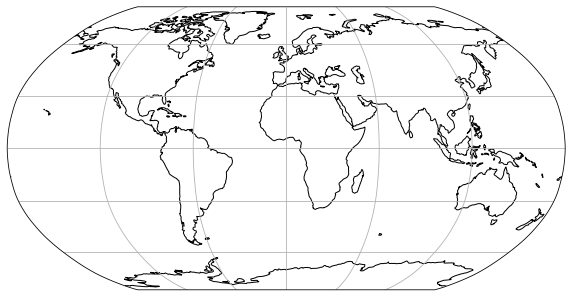

In [14]:
plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

ax.coastlines()
ax.gridlines()

plt.scatter(earthquakes_mag5['longitude'],earthquakes_mag5['latitude'],
            transform=ccrs.PlateCarree(),s=8,label='Magnitude 5')
# Add plt.scatter() for the rest of the magnitude dataframes. 
# Make sure to label them so that they show up in the legend

plt.legend()        
plt.show()

After you have made such a map, answer these questions:
- *At what type of plate boundaries do the largest earthquakes occur?*
- *At what depths do the largest earthquakes occur? Additional code that makes additional plots to answer this question. A depth vs magnitude plot would be helpful for example. And consider this video about brittle vs. ductile deformation from the reading*

[![](http://img.youtube.com/vi/fb9ytgi3br4/0.jpg)](http://www.youtube.com/watch?v=fb9ytgi3br4 "")

**Write your answers here**



In [15]:
plt.scatter(earthquakes_mag5['mag'],-1*earthquakes_mag5['depth'],label='magnitude 5',alpha=0.4)
# Add plt.scatter() for the rest of the magnitude dataframes. 
# Make sure to label them so that they show up in the legend

plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.show()

TypeError: 'ellipsis' object is not subscriptable

## Let's Analyze an Earthquake Seismogram

An interesting earthquake in 2020 occured 100km SSE of Perryville, Alaska at 55.0683°N 158.5543°W and was a magnitude 7.8 event.

Below is a map of the earthquake location and the location of the Columbia College, Columbia, CA, USA seismic station that recorded a seismograph we will be analyzing.

You can find the distance between two points on Earth using the solver found at https://www.nhc.noaa.gov/gccalc.shtml  You should compute the distance as a reference point for later analysis.

Go ahead and **add plate boundaries to this map as well.**

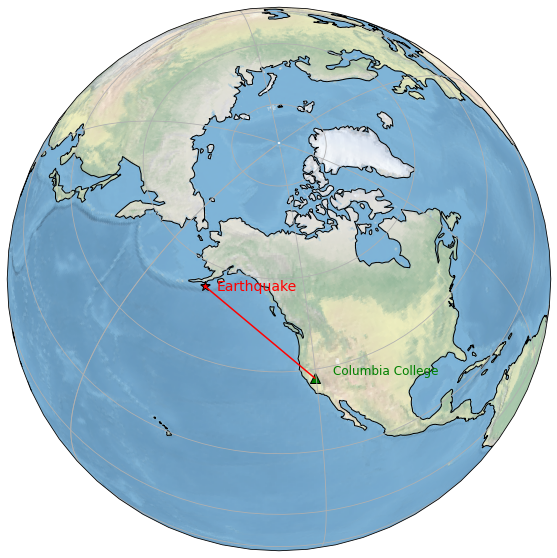

In [5]:
# Earthquake location
Earthquake_lat = 55.0683
Earthquake_lon = -158.5543

# Station Location Columbia College, Columbia, CA, USA
station_lat = 38.03455
station_lon = -120.38651

plt.figure(1,(10,10))

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-130,central_latitude=60))
ax.set_global()

plt.scatter(Earthquake_lon,Earthquake_lat,s=100,marker='*',
            color='red', edgecolor='black',transform=ccrs.PlateCarree())
plt.text(Earthquake_lon+5,Earthquake_lat,'Earthquake',fontsize=14,color='red',
         transform=ccrs.PlateCarree())

plt.scatter(station_lon,station_lat,s=100,marker='^',
            color='green', edgecolor='black',transform=ccrs.PlateCarree())
plt.text(station_lon+5,station_lat,'Columbia College',fontsize=12,color='green',
         transform=ccrs.PlateCarree())

plt.plot([Earthquake_lon,station_lon],[Earthquake_lat,station_lat],
         color='red',transform=ccrs.Geodetic())

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

*At what type of plate boundary did this earthquake occur?*

**Write your answer here**


More geologic context about this quake can be found here: https://www.iris.edu/hq/files/programs/education_and_outreach/retm/tm_200722_alaska/200722_Alaska.pdf

### Load a Seismogram of this Earthquake

Let's load the .csv (Comma Separated Variable) data file of the seismogram of the largest earthquake that occured in the past month, recorded at the Columbia College, Columbia, CA, USA seismic station. Samples were taken every 0.025 seconds (40 Hz) and the record starts 60 seconds before the P wave arrival. https://www.iris.edu/app/station_monitor/#2020-07-22T06:12:44/BK-CMB/trace/BK-CMB|11273635

In [6]:
seismogram = pd.read_csv('./data/BK.CMB.00.BHZ.Q.2020-07-22T061756.019538.csv',header=9,names=['Time','Sample'])
seismogram.head()

,Time,Sample
0,2020-07-22T06:17:56.044538Z,-2210
1,2020-07-22T06:17:56.069538Z,-2244
2,2020-07-22T06:17:56.094538Z,-2267
3,2020-07-22T06:17:56.119538Z,-2258
4,2020-07-22T06:17:56.144538Z,-2203


The `seismogram['Sample']` column is a time series of the velocity of the ground motion at the location of the seismic station due to this earthquake. Let's rename it velocity.

In [19]:
velocity = 

Now let's parse the `seismogram['Time']` column from a string to a pandas datetime object. To do this we use the function `pd.to_datetime()`. We'll see more datetime features in the future, they're pretty great.

In [9]:
time = pd.to_datetime(seismogram['Time'])

Let's plot the seismogram (`time` on the x-axis and `velocity` on the y-axis), add labels and use `ax.annotate` to label the P and S waves' arrivals. 

Sample rate=0.025 seconds/sample
S minus P time = 5.00 minutes


TypeError: float() argument must be a string or a number, not 'ellipsis'

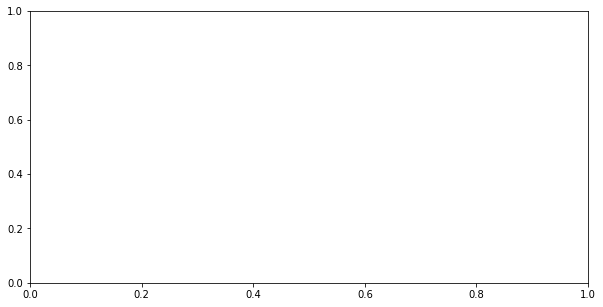

In [10]:
#note that the first sample of the record is 1 minute (60 seconds) before the P-wave. Therefore
ptime=1.0                                 #minutes
#The stime is something we can define
stime=6.0                               #minutes

#find the sample rate (sample interval)
#Using mdates.date2num converts the complex time variable to the number of days
factor=24*60*60                                                   #this is the number of seconds in a day
dt=(mdates.date2num(time[1])-mdates.date2num(time[0]))*factor     #sample rate is just difference between two samples
print(f'Sample rate={dt:.3f} seconds/sample')

#convert the ptime, and stime to samples
psamp=np.int64(ptime*60/dt)
ssamp=np.int64(stime*60/dt)

#compute S minus P time which is used below to find the distance
sminusp=(mdates.date2num(time[ssamp])-mdates.date2num(time[psamp]))*factor/60 #divide by 60 to convert seconds to minutes
print(f'S minus P time = {sminusp:0.2f} minutes')

#make the figure
fig = plt.figure(1,(10,5))
ax = fig.add_subplot()
plt.plot(...,...)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel(..., fontsize=14)
plt.ylabel(..., fontsize=14)
plt.title('Seismogram of Alaskan earthquake recorded at Columbia College', fontsize=14)

ax.annotate('P wave', (mdates.date2num(time[psamp]), velocity[psamp]), xytext=(-10, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('S wave', (mdates.date2num(time[ssamp]), velocity[ssamp]), xytext=(-10, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

ax.grid(True)
plt.show()

Using the annotations, I have indicated when the P wave arrived (at 2020-07-22 06:18:56 UTC) and when the S wave arrived (~5.0 minutes later at 2020-07-22 06:23:56 UTC). The P (primary) wave arrives before the S (secondary/shear) wave. The farther away an earthquake is from a receiver, the more time there is between the arrivals of the P and S waves. More seismograms for this quake can be viewed here: https://ds.iris.edu/gsv/tsplotForID.phtml?evid=11273635&useCache=1&epo=0&caller=map

<img src="./figures/seis_wave_travel_time.png">


The difference in these arrival times can be used to determine the distance from the recording station to the earthquake using a travel time curve if we know the velocities of the waves through the Earth.  So first we need to know how these two waves behave — particularly their velocities. Check out this short video demonstration (click on the video the right once you click through the link). 

https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created

Calculated traveltimes based on a standard earth models are in the the data folder as `arrival_times.csv`. The time unit is minutes. Let's import them as a dataframe.

In [11]:
travel_times = pd.read_csv('./data/arrival_times.csv')
travel_times.head()

,degrees_from_quake,P_wave_time,S_wave_time
0,0.0,0.090000,0.156667
1,0.5,0.176667,0.306667
2,1.0,0.295000,0.520000
3,1.5,0.410000,0.726667
4,2.0,0.523333,0.930000


We can make a plot of the travel times.

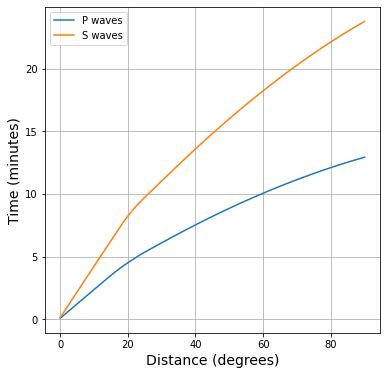

In [12]:
fig = plt.figure(1,(6,6))
plt.plot(travel_times['degrees_from_quake'],travel_times['P_wave_time'],label='P waves')
plt.plot(travel_times['degrees_from_quake'],travel_times['S_wave_time'],label='S waves')
plt.xlabel('Distance (degrees)', fontsize=14)
plt.ylabel('Time (minutes)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


From the interpretation of the seismograph, we know that at Columbia College, the S wave arrived ~5.0 minutes after the P wave. We can then use this travel time curve to estimate the distance. But first return to the seismogram plot cell and adjust the stime parameter (you can use a fraction of a minute) to better pick the S wave arrival.

**What did you base your time adjustment on, and what is the S minus P time you estimated from your pick?**

**write answer here**


Now we need the S-P time from the model. Make a new column in the travel_times dataframe that is the difference between the two times. In pandas you can make a new column that is a calculation of other columns. So if you had a column called 'column_b' and one called 'column_a' you could make a new column like this:

```travel_times['new_column'] = travel_times['column_b'] - travel_times['column_a']```

Go ahead and make a new column called 'S-P_difference' that is the difference between the S wave time and the P wave time. Then make a plot of it vs. distance from earthquake. Devise a logical test that finds the best distance in degrees from the quake. This can be done by computing the difference between the S-P difference from the model and the observed S-P time and testing to see if it is less than some tolerance of say 0.1 minute.

In [14]:
travel_times[...] = ...

In [16]:
#find best distance
travel_times['degrees_from_quake'][...]

0       0.0
1       0.5
2       1.0
3       1.5
4       2.0
       ... 
96     86.0
97     87.0
98     88.0
99     89.0
100    90.0
Name: degrees_from_quake, Length: 101, dtype: float64

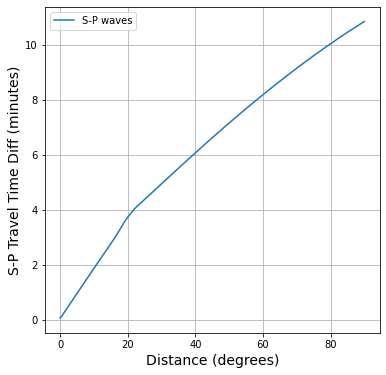

In [19]:
fig = plt.figure(1,(6,6))
plt.plot(travel_times['degrees_from_quake'],travel_times['S-P_difference'],label='S-P waves')
plt.xlabel('Distance (degrees)', fontsize=14)
plt.ylabel('S-P Travel Time Diff (minutes)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

Once you have plotted this travel time difference curve, use it (and/or) the S-P_difference to estimate the distance in degrees. Then convert this angular distance between the earthquake and the seismic station with the equation $d = r \theta $ where $d$ is the distance between the two points, $r$ is the radius (radius of Earth is 6371 kilometers), and $\theta$ is the angular separation between the points in radians. 

In [17]:
radius = 6371; # earth's radius in kilometers
ang_deg = ...; # angular separation between EQ and station in degrees
ang_rad = ... # convert degrees to radians
dist = ... # distance in kilometers
print(dist) 
print('distance to station from earthquake epicenter (km)')

TypeError: unsupported operand type(s) for *: 'ellipsis' and 'float'

How does your estimate compare to the distance calculated using the NOAA website above? 

**Write answer here**

If they are very different you may want to reconsider your stime pick and recompute.

By computing the distance from the earthquake to at least three stations you can locate the epicenter of the earthquake. 

<img src="./figures/IRIS_eq_tri.png">

### Turn in this notebook

Export your completed notebook to pdf and upload to bcourses.